In [2]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud

import spacy

In [3]:
nlp = spacy.load('en_core_web_sm')


In [4]:
from spacy.cli import download

In [5]:
download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
from textblob import TextBlob
from pattern.en import sentiment

In [15]:
r=requests.get('https://www.newsy.com/mental-health/')

In [16]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [17]:
html = r.text

In [18]:
# Printing the first 500 characters in html
print(html[:500])

<!DOCTYPE html><html lang="en"><head><!-- Google Analytics --><script>
            (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
            (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
            m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
            })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

            ga('create', 'UA-5101570-1', 'auto');
           


In [19]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

In [20]:
#total length
len(text)

4083

In [21]:
#having a look at the text

print(text[100:1100])

entSportsMental Healthshowswatch livesearchFollow Us





Through hyper-personal and thoughtful storytelling, Newsy's exclusive reporting exposes the important nuance in America’s mental health crisis, with a focus on how differently people typically experience issues based on demographics and geography.MENTAL HEALTH RESOURCES988 Suicide & Crisis Lifeline 
Call or text 988 or chat 988lifeline.org. The 988 Suicide & Crisis Lifeline is a national network of local crisis centers that provide free and confidential emotional support to people in suicidal crisis or emotional distress 24 hours a day, 7 days a week.

Crisis Text Line 
Text MHA to 741741 and you'll be connected to a Mental Health America trained Crisis Counselor. 
Other hotline resources are available here. You can also find support groups through your local MHA affiliate who can assist.  

Interactive Resources

Take a mental health test from Mental Health America
Learn more about 988 crisis response legislation in your state


In [22]:
clean_text= text.replace("\n", " ")

In [23]:
clean_text= clean_text.replace("/", " ")    

In [24]:
clean_text

"Mental Health Initiative     newsynewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us      Through hyper-personal and thoughtful storytelling, Newsy's exclusive reporting exposes the important nuance in America’s mental health crisis, with a focus on how differently people typically experience issues based on demographics and geography.MENTAL HEALTH RESOURCES988 Suicide & Crisis Lifeline\xa0 Call or text 988 or chat 988lifeline.org. The 988 Suicide & Crisis Lifeline is a national network of local crisis centers that provide\xa0free and confidential emotional support to people in suicidal crisis or emotional distress 24 hours a day, 7 days a week.  Crisis Text Line\xa0 Text MHA to 741741 and you'll be connected to a Mental Health America trained Crisis Counselor.\xa0\r Other hotline resources are available here. You can also find support groups through your local MHA affiliate who can assist.\xa0\xa0  Interactive Resour

In [25]:
clean_text= ''.join([c for c in clean_text if c != "\'"])

In [26]:
sentence=[]


tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [27]:
sentence

['Mental Health Initiative     newsynewsU.S. NewsWorldLifePoliticsScience',
 'HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us      Through hyper-personal and thoughtful storytelling, Newsys exclusive reporting exposes the important nuance in America’s mental health crisis, with a focus on how differently people typically experience issues based on demographics and geography.',
 'MENTAL HEALTH RESOURCES988 Suicide & Crisis Lifeline\xa0 Call or text 988 or chat 988lifeline.org.',
 'The 988 Suicide & Crisis Lifeline is a national network of local crisis centers that provide\xa0free and confidential emotional support to people in suicidal crisis or emotional distress 24 hours a day, 7 days a week.',
 'Crisis Text Line\xa0 Text MHA to 741741 and youll be connected to a Mental Health America trained Crisis Counselor.',
 'Other hotline resources are available here.',
 'You can also find support groups through your local MHA affiliate who can assist.',
 '',
 'I

In [28]:
print(len(sentence))

24


In [29]:
print(sentence[2])

MENTAL HEALTH RESOURCES988 Suicide & Crisis Lifeline  Call or text 988 or chat 988lifeline.org.


In [30]:
textblob_sentiment=[]

for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    
    textblob_sentiment.append([s,a,b])

In [31]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity']) 

In [32]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Mental Health Initiative newsynewsU.S. New...,-0.100000,0.200
1,HealthTechBusinessEntertainmentSportsMental He...,0.106667,0.560
2,MENTAL HEALTH RESOURCES988 Suicide & Crisis Li...,-0.100000,0.200
3,The 988 Suicide & Crisis Lifeline is a nationa...,0.100000,0.525
4,Crisis Text Line Text MHA to 741741 and youll...,-0.100000,0.200


In [33]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      24 non-null     object 
 1   Polarity      24 non-null     float64
 2   Subjectivity  24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

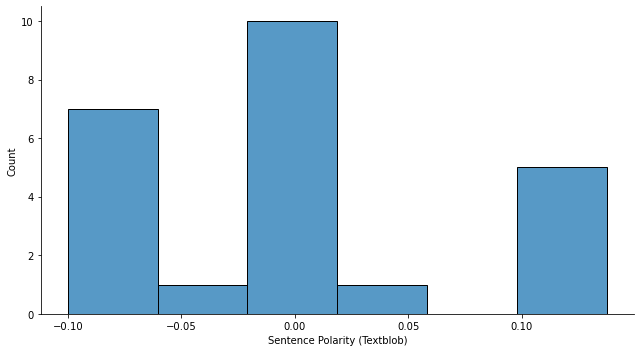

In [34]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

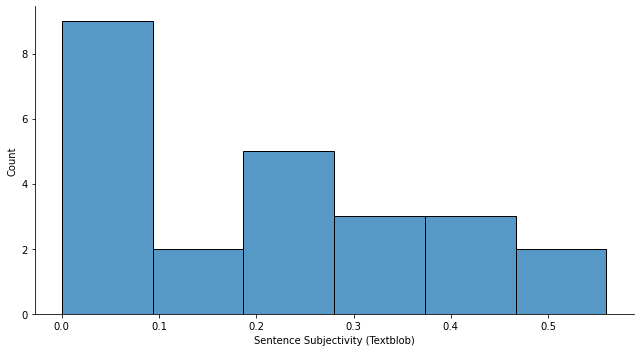

In [35]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [36]:
pattern_sentiment=[]

for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    
    pattern_sentiment.append([s,c,d])

In [37]:
pattern_sentiment[1]

['HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us      Through hyper-personal and thoughtful storytelling, Newsys exclusive reporting exposes the important nuance in America’s mental health crisis, with a focus on how differently people typically experience issues based on demographics and geography.',
 0.10666666666666669,
 0.5599999999999999]

In [38]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [39]:
df_pattern.head()

,Sentence,Polarity,Subjectivity
0,Mental Health Initiative newsynewsU.S. New...,-0.100000,0.200
1,HealthTechBusinessEntertainmentSportsMental He...,0.106667,0.560
2,MENTAL HEALTH RESOURCES988 Suicide & Crisis Li...,-0.100000,0.200
3,The 988 Suicide & Crisis Lifeline is a nationa...,0.100000,0.525
4,Crisis Text Line Text MHA to 741741 and youll...,-0.100000,0.200


In [40]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      24 non-null     object 
 1   Polarity      24 non-null     float64
 2   Subjectivity  24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


Text(0.5, 6.79999999999999, 'Sentence Polarity (Pattern)')

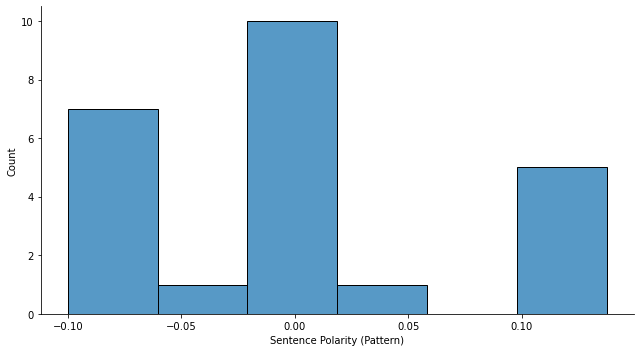

In [41]:
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Pattern)')

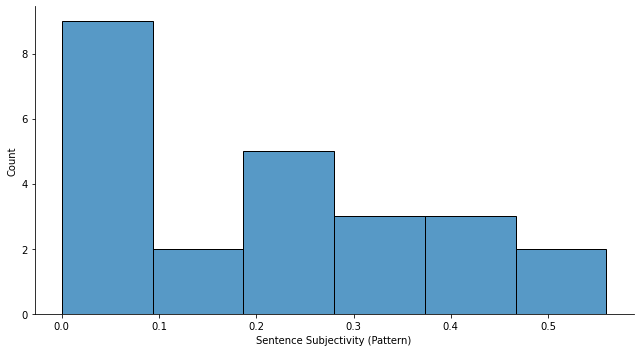

In [42]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

In [43]:
clean_text[100:300]

'entSportsMental Healthshowswatch livesearchFollow Us      Through hyper-personal and thoughtful storytelling, Newsys exclusive reporting exposes the important nuance in America’s mental health crisis,'

In [44]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [45]:
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)

In [46]:
len(tokens)

569

In [47]:
print(tokens[0:10])

['Mental', 'Health', 'Initiative', 'newsynewsU', 'S', 'NewsWorldLifePoliticsScience', 'HealthTechBusinessEntertainmentSportsMental', 'Healthshowswatch', 'livesearchFollow', 'Us']


In [48]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [49]:
len(words)

569

In [50]:
print(words[0:10])

['mental', 'health', 'initiative', 'newsynewsu', 's', 'newsworldlifepoliticsscience', 'healthtechbusinessentertainmentsportsmental', 'healthshowswatch', 'livesearchfollow', 'us']


In [51]:
stopwords = nltk.corpus.stopwords.words('english')

In [52]:
#Now we need to remove the stop words from the words variable

#A new list to hold Moby Dick with No Stop words
words_new = []

#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [53]:
len(words_new)

418

In [54]:
print(words_new[0:10])

['mental', 'health', 'initiative', 'newsynewsu', 'newsworldlifepoliticsscience', 'healthtechbusinessentertainmentsportsmental', 'healthshowswatch', 'livesearchfollow', 'us', 'hyper']


In [55]:
freq_dist = nltk.FreqDist(words_new)

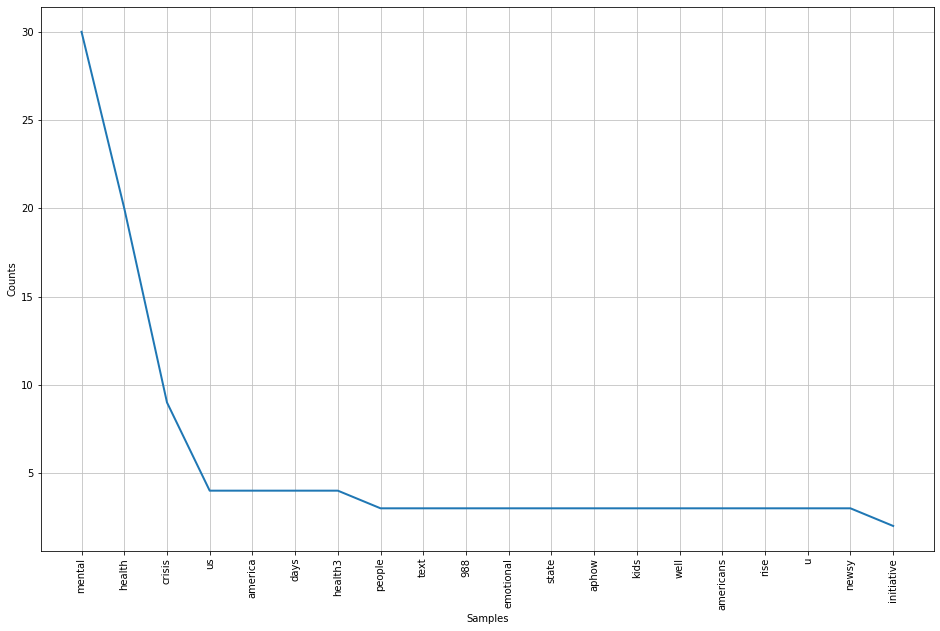

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [57]:
#converting into string

res=' '.join([i for i in words_new if not i.isdigit()]) 

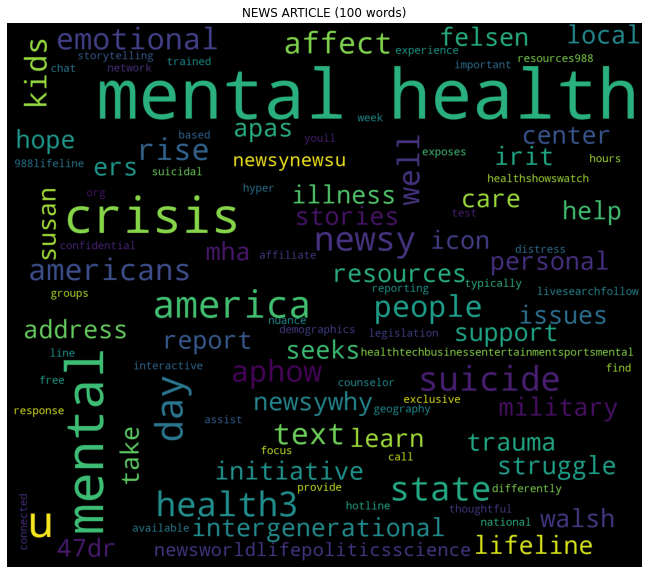

In [58]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()